In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
data = pd.read_csv('KyphosisDisease.csv')
data = data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 4)
['age', 'number', 'start', 'y']


In [ ]:
data.head()

,age,number,start,y
0,80,4,7,0
1,36,7,8,0
2,191,5,4,0
3,24,8,15,0
4,177,5,2,0


In [ ]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

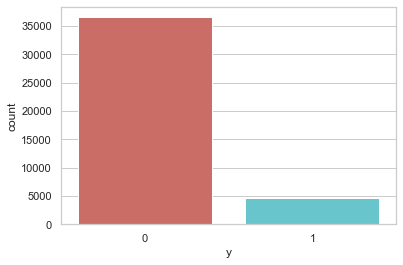

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.countplot(x='y', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [ ]:
count_no_kyp = len(data[data['y']==0])
count_kyp = len(data[data['y']==1])
pct_of_no_kyp = count_no_kyp/(count_no_kyp+count_kyp)
print("percentage of no kyphosis is", pct_of_no_kyp*100)
pct_of_kyp = count_kyp/(count_no_kyp+count_kyp)
print("percentage of kyphosis", pct_of_kyp*100)

percentage of no kyphosis is 88.73458288821988
percentage of kyphosis 11.265417111780131


In [ ]:
data.groupby('y').mean()

,age,number,start
y,,,
0,103.588350,5.505062,9.482270
1,85.218103,6.526509,7.441379


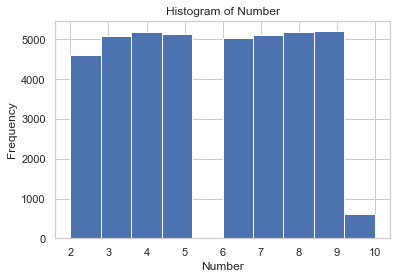

In [ ]:
data.number.hist()
plt.title('Histogram of Number')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.savefig('hist_number')

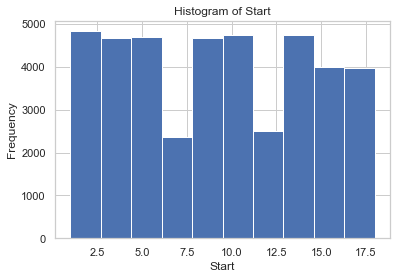

In [ ]:
data.start.hist()
plt.title('Histogram of Start')
plt.xlabel('Start')
plt.ylabel('Frequency')
plt.savefig('hist_start')

In [ ]:
data_final = data.copy()
data_final.columns.values

array(['age', 'number', 'start', 'y'], dtype=object)

In [ ]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no kyphosis in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of kyphosis",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no kyphosis data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of kyphosis data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  51106
Number of no kyphosis in oversampled data 25553
Number of kyphosis 25553
Proportion of no kyphosis data in oversampled data is  0.5
Proportion of kyphosis data in oversampled data is  0.5


In [ ]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
rfe = RFE(dtree, 3)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True]
[1 1 1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [ ]:
cols=['age', 'number', 'start'] 
X=os_data_X[cols]
y=os_data_y['y']

In [ ]:
dtree = DecisionTreeClassifier()
dtree_model=dtree.fit(X,y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dtree.predict(X_test)
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(dtree.score(X_test, y_test)))

Accuracy of decision tree classifier on test set: 0.85


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6217 1419]
 [ 919 6777]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      7636
           1       0.83      0.88      0.85      7696

    accuracy                           0.85     15332
   macro avg       0.85      0.85      0.85     15332
weighted avg       0.85      0.85      0.85     15332



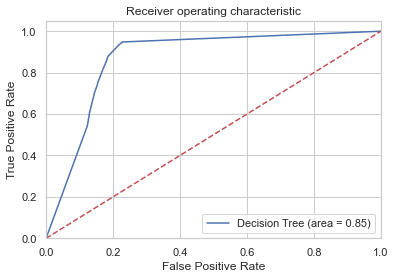

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dtree_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dtree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()